In [9]:
# DAY 1 – DATA OVERVIEW

import pandas as pd
import os

# Step 1: Define paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\data\Glassdoor_Salary_Cleaned_Version.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
output_file = os.path.join(output_dir, "day1_overview.txt")

# Step 2: Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Step 3: Load dataset
df = pd.read_csv(input_path)

# Step 4: Prepare output text
output_lines = []

output_lines.append("DAY 1 – DATA OVERVIEW\n")
output_lines.append(f"Dataset Shape: {df.shape}\n")
print("Dataset Shape:", df.shape)

output_lines.append("\nColumn Names:\n")
output_lines.append(", ".join(df.columns.tolist()) + "\n")
print("\nColumn Names:")
print(df.columns.tolist())

output_lines.append("\nMissing Values in Each Column:\n")
output_lines.append(df.isnull().sum().to_string() + "\n")
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

output_lines.append("\nData Types:\n")
output_lines.append(df.dtypes.to_string() + "\n")
print("\nData Types:")
print(df.dtypes)

output_lines.append("\nSample Data (First 5 Rows):\n")
output_lines.append(df.head().to_string() + "\n")
print("\nSample Data (First 5 Rows):")
print(df.head())

output_lines.append("\nSummary Statistics:\n")
output_lines.append(df.describe(include='all').to_string() + "\n")
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Step 5: Save output to file
with open(output_file, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print(f"\nOutput also saved to: {output_file}")


Dataset Shape: (742, 28)

Column Names:
['Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel']

Missing Values in Each Column:
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn          

In [10]:
# DAY 2 – DATA CLEANING

import pandas as pd
import os

# Step 1: Define file paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\data\Glassdoor_Salary_Cleaned_Version.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
output_file = os.path.join(output_dir, "day2_cleaning.txt")
cleaned_data_path = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"

# Step 2: Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.dirname(cleaned_data_path), exist_ok=True)

# Step 3: Load dataset
df = pd.read_csv(input_path)

# Step 4: Prepare output lines
output_lines = []
output_lines.append("DAY 2 – DATA CLEANING\n")

output_lines.append(f"Before duplicate removal: {df.shape}\n")
print("Before duplicate removal:", df.shape)

df = df.drop_duplicates()

output_lines.append(f"After duplicate removal: {df.shape}\n")
print("After duplicate removal:", df.shape)

# Step 5: Standardize key text fields
text_columns = ['Job Title', 'Company Name', 'Location', 'Industry', 'Sector']
for col in text_columns:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Step 6: Filter only data-related job titles
data_roles = ['data', 'machine learning', 'ml', 'ai', 'business intelligence']
df = df[df['Job Title'].str.contains('|'.join(data_roles), na=False)]

output_lines.append(f"Shape after filtering for data jobs: {df.shape}\n")
print("Shape after filtering for data jobs:", df.shape)

# Step 7: Save the cleaned dataset
df.to_csv(cleaned_data_path, index=False)
output_lines.append(f"Cleaned data saved to: {cleaned_data_path}\n")
print(f"Cleaned data saved to: {cleaned_data_path}")

# Step 8: Save the text report
with open(output_file, "w", encoding="utf-8") as f:
    f.write("".join(output_lines))

print(f"Output report saved to: {output_file}")


Before duplicate removal: (742, 28)
After duplicate removal: (467, 28)
Shape after filtering for data jobs: (385, 28)
Cleaned data saved to: D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv
Output report saved to: D:\Job posting and trends\kaggle _dataset_job\outputs\day2_cleaning.txt


DAY 3: TOP JOB TITLES

Top 10 Most Common Job Titles:

                                                          Job Title  Postings
                                                     data scientist       194
                                                      data engineer        82
                                                       data analyst        71
                                          machine learning engineer         9
                                                       data manager         8
                                                     data architect         2
                                                 research scientist         2
                                  data modeler (analytical systems)         1
                       principal, data science - advanced analytics         1
sr expert data science, advanced visual analytics (associate level)         1


Total Unique Simplified Job Titles: 24


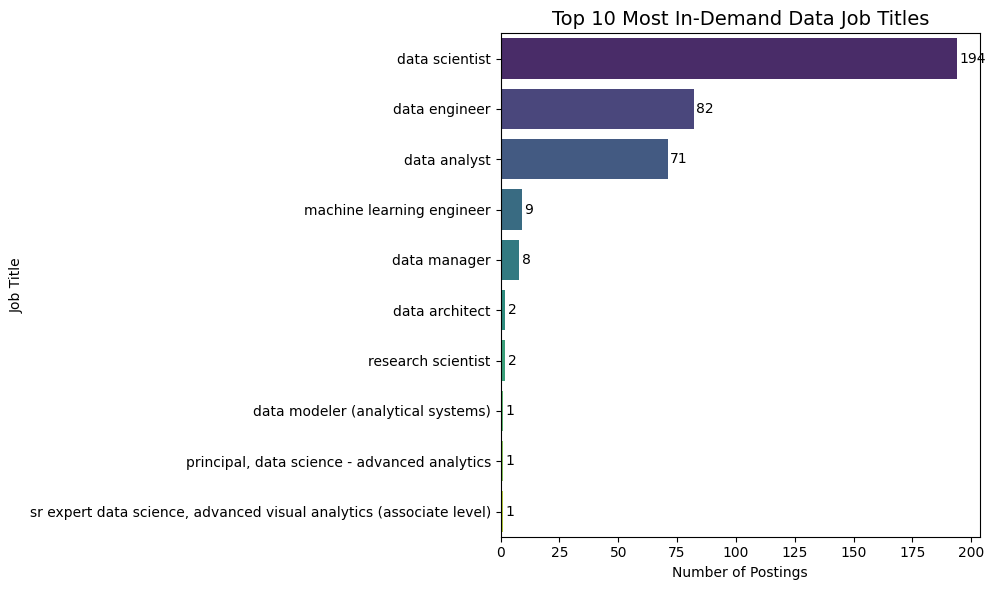

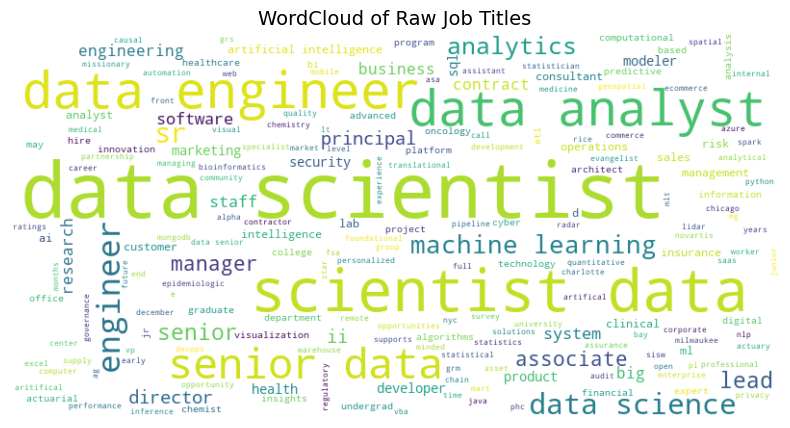

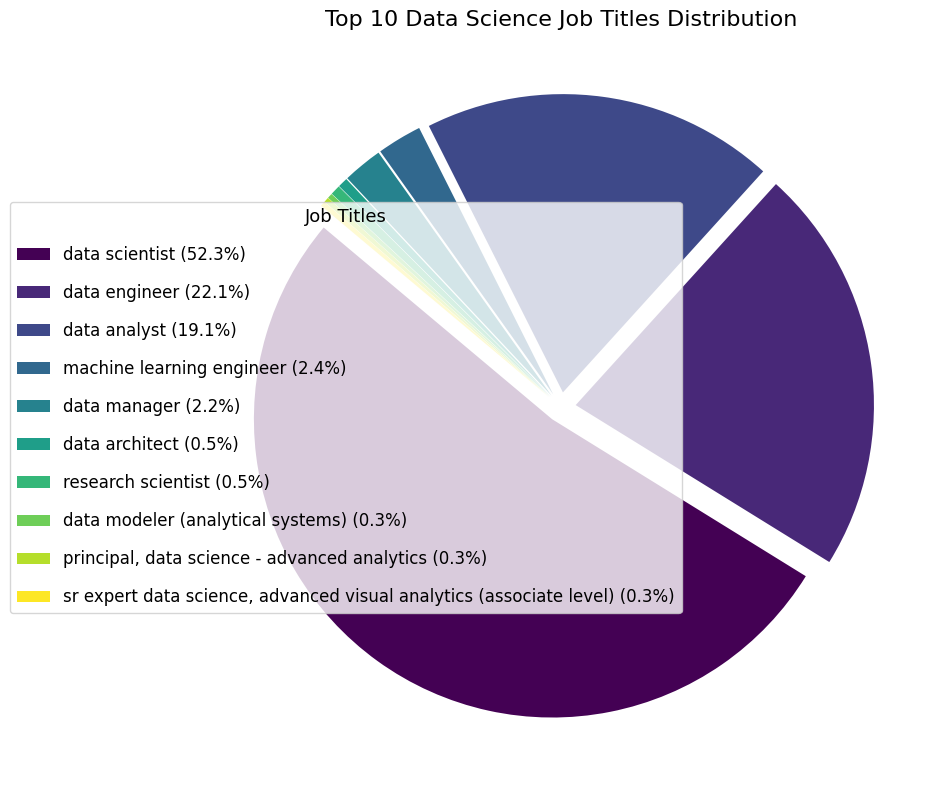


Saved: Bar chart, WordCloud, and Pie chart to outputs folder.


In [11]:
# DAY 3: TOP JOB TITLES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import os

# Step 1: Set paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)
text_output_path = os.path.join(output_dir, "day3_top_titles.txt")

# Step 2: Load and clean data
df = pd.read_csv(input_path)
df['Job Title'] = df['Job Title'].astype(str).str.lower().str.strip()

# Step 3: Simplify job titles
def simplify_title(title):
    if 'analyst' in title:
        return 'data analyst'
    elif 'scientist' in title and 'research' not in title:
        return 'data scientist'
    elif 'engineer' in title and 'machine learning' not in title:
        return 'data engineer'
    elif 'machine learning' in title:
        return 'machine learning engineer'
    elif 'ml' in title:
        return 'ml engineer'
    elif 'ai' in title:
        return 'ai specialist'
    elif 'business intelligence' in title or 'bi' in title:
        return 'bi analyst'
    elif 'intern' in title:
        return 'data science intern'
    elif 'architect' in title:
        return 'data architect'
    elif 'manager' in title:
        return 'data manager'
    elif 'developer' in title:
        return 'data developer'
    elif 'research' in title:
        return 'research scientist'
    else:
        return title.strip()

df['Simplified Title'] = df['Job Title'].apply(simplify_title)

# Step 4: Top job titles
top_titles = df['Simplified Title'].value_counts().head(10)
top_titles_df = pd.DataFrame({'Job Title': top_titles.index, 'Postings': top_titles.values})

# Save top titles to text output
output_lines = []
output_lines.append("DAY 3: TOP JOB TITLES\n")
output_lines.append("Top 10 Most Common Job Titles:\n")
output_lines.append(top_titles_df.to_string(index=False))
output_lines.append("\n\nTotal Unique Simplified Job Titles: " + str(df['Simplified Title'].nunique()))

# Print to console
print("\n".join(output_lines))

# Save to file
with open(text_output_path, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

# Step 5: Plot 1 - Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_titles_df, x='Postings', y='Job Title', hue='Job Title', palette='viridis', dodge=False, legend=False)
plt.title("Top 10 Most In-Demand Data Job Titles", fontsize=14)
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
for i, v in enumerate(top_titles_df['Postings']):
    plt.text(v + 1, i, str(v), va='center')
plt.tight_layout()
bar_path = os.path.join(output_dir, "day3_bar_top_titles.png")
plt.savefig(bar_path)
plt.show()

# Step 6: Plot 2 - WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Job Title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Raw Job Titles", fontsize=14)
wordcloud_path = os.path.join(output_dir, "day3_wordcloud_titles.png")
plt.savefig(wordcloud_path)
plt.show()

# Step 7: Plot 3 - Pie Chart
labels = top_titles_df['Job Title']
sizes = top_titles_df['Postings']
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
explode = [0.05] * len(labels)
percentages = [f"{(s / sum(sizes)) * 100:.1f}%" for s in sizes]
labels_with_percent = [f"{role} ({pct})" for role, pct in zip(labels, percentages)]

fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts = ax.pie(sizes, colors=colors, explode=explode, startangle=140, labels=None)
ax.legend(wedges, labels_with_percent, title="Job Titles",
          loc="center left", bbox_to_anchor=(-0.25, 0.5),
          fontsize=12, title_fontsize=13, labelspacing=1.2)
plt.title("Top 10 Data Science Job Titles Distribution", fontsize=16)
plt.tight_layout()
pie_path = os.path.join(output_dir, "day3_pie_top_titles.png")
plt.savefig(pie_path)
plt.show()

print("\nSaved: Bar chart, WordCloud, and Pie chart to outputs folder.")


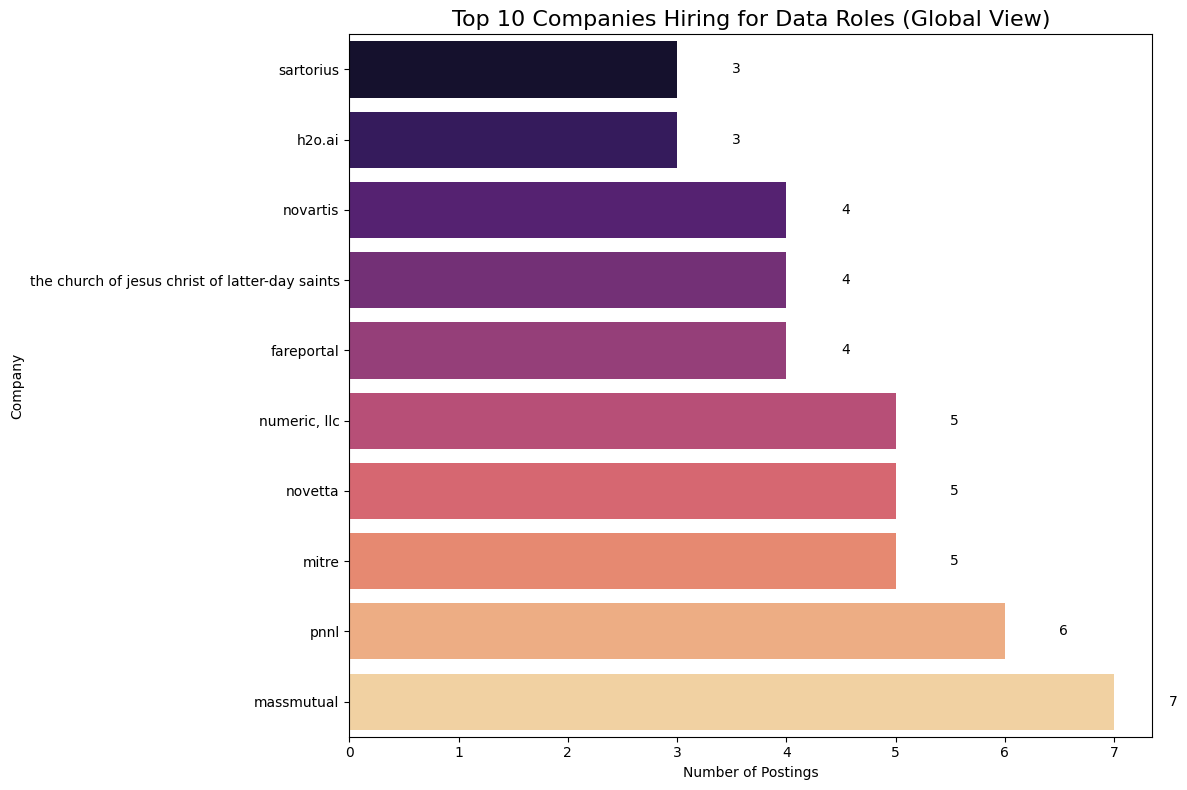

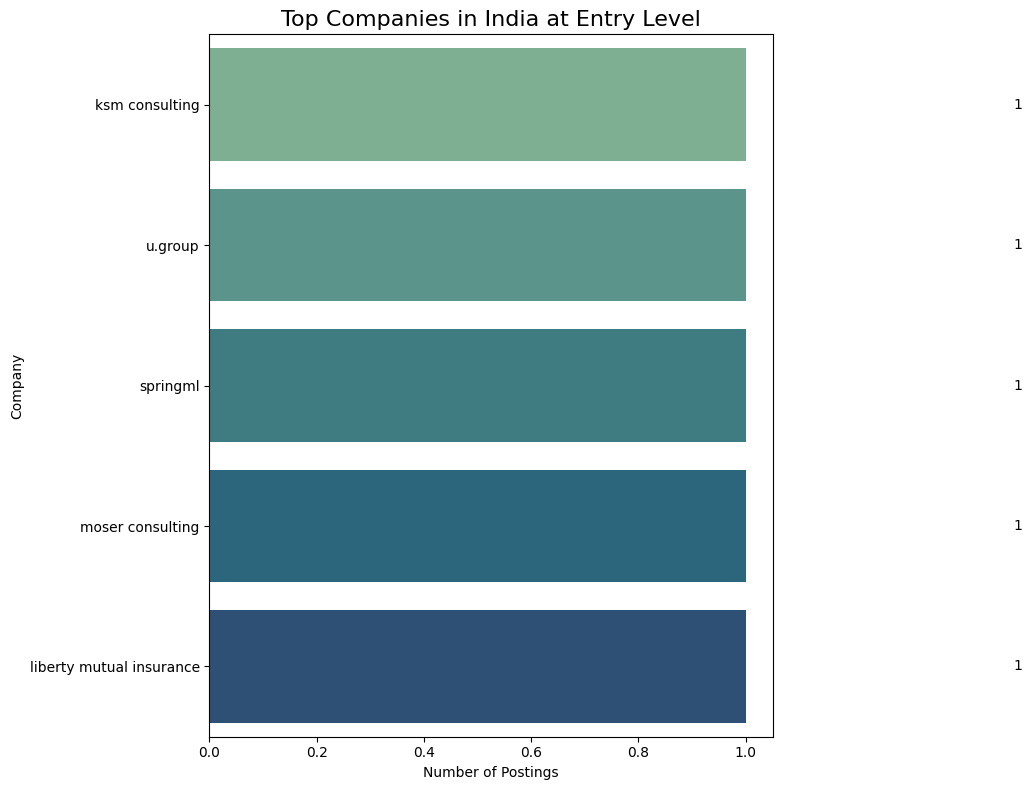

DAY 4: TOP COMPANIES HIRING

Top 10 Companies Hiring for Data Roles (Global View):
                                        Company  Postings
                                     massmutual         7
                                           pnnl         6
                                   numeric, llc         5
                                        novetta         5
                                          mitre         5
                                       novartis         4
the church of jesus christ of latter-day saints         4
                                     fareportal         4
                                      sartorius         3
                                         h2o.ai         3

Top Companies Hiring in India at Entry Level:
                 Company  Postings
          ksm consulting         1
                 u.group         1
                springml         1
        moser consulting         1
liberty mutual insurance         1

All outputs saved suc

In [12]:
# DAY 4 – TOP COMPANIES HIRING

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)
text_output_path = os.path.join(output_dir, "day4_top_companies.txt")

# Load dataset
full_df = pd.read_csv(input_path)

# Detect columns
company_col = 'Company Name' if 'Company Name' in full_df.columns else 'Company'
location_col = 'Location' if 'Location' in full_df.columns else 'City' if 'City' in full_df.columns else None
level_col = 'Seniority Level' if 'Seniority Level' in full_df.columns else 'Level' if 'Level' in full_df.columns else None

# Clean text
full_df[company_col] = full_df[company_col].astype(str).str.strip().str.replace(r'\n.*', '', regex=True)
full_df['Job Title'] = full_df['Job Title'].astype(str).str.lower().str.strip()

# Simplify job titles
def simplify_title(title):
    title = title.lower()
    if 'analyst' in title:
        return 'data analyst'
    elif 'scientist' in title and 'research' not in title:
        return 'data scientist'
    elif 'engineer' in title and 'machine learning' not in title:
        return 'data engineer'
    elif 'machine learning' in title:
        return 'machine learning engineer'
    elif 'ml' in title:
        return 'ml engineer'
    elif 'ai' in title:
        return 'ai specialist'
    elif 'business intelligence' in title or 'bi' in title:
        return 'bi analyst'
    elif 'intern' in title:
        return 'data science intern'
    elif 'architect' in title:
        return 'data architect'
    elif 'manager' in title:
        return 'data manager'
    elif 'developer' in title:
        return 'data developer'
    elif 'research' in title:
        return 'research scientist'
    else:
        return title.strip()

full_df['Simplified Title'] = full_df['Job Title'].apply(simplify_title)

# Filter for data-related jobs
data_roles = ['data analyst', 'data scientist', 'data engineer', 'machine learning engineer',
              'ml engineer', 'ai specialist', 'bi analyst', 'data science intern',
              'data architect', 'data manager', 'data developer', 'research scientist']
full_df = full_df[full_df['Simplified Title'].isin(data_roles)]

# ------------------ GLOBAL TOP 10 COMPANIES ------------------
global_top = full_df[company_col].value_counts().nlargest(10)
global_df = pd.DataFrame({'Company': global_top.index, 'Postings': global_top.values}).sort_values(by='Postings', ascending=True)

# Save global plot
plt.figure(figsize=(12, 8))
sns.barplot(data=global_df, x='Postings', y='Company', hue='Company', palette='magma', legend=False)
plt.title("Top 10 Companies Hiring for Data Roles (Global View)", fontsize=16)
plt.xlabel("Number of Postings")
plt.ylabel("Company")
for index, value in enumerate(global_df['Postings']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10)
plt.tight_layout()
global_plot_path = os.path.join(output_dir, "day4_global_top_companies.png")
plt.savefig(global_plot_path)
plt.show()

# ------------------ FILTERED VIEW: India + Entry ------------------
location_filter = 'India'
level_filter = 'entry'
df_filtered = full_df.copy()

if location_col:
    df_filtered[location_col] = df_filtered[location_col].astype(str).str.strip()
    df_filtered = df_filtered[df_filtered[location_col].str.contains(location_filter, case=False, na=False)]

if level_col:
    df_filtered[level_col] = df_filtered[level_col].astype(str).str.strip()
    df_filtered = df_filtered[df_filtered[level_col].str.contains(level_filter, case=False, na=False)]

filtered_top = df_filtered[company_col].value_counts().nlargest(10)
filtered_df = pd.DataFrame({'Company': filtered_top.index, 'Postings': filtered_top.values}).sort_values(by='Postings', ascending=True)

# Save filtered plot
if not filtered_df.empty:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=filtered_df, x='Postings', y='Company', hue='Company', palette='crest', legend=False)
    plt.title(f"Top Companies in {location_filter} at {level_filter.title()} Level", fontsize=16)
    plt.xlabel("Number of Postings")
    plt.ylabel("Company")
    for index, value in enumerate(filtered_df['Postings']):
        plt.text(value + 0.5, index, str(value), va='center', fontsize=10)
    plt.tight_layout()
    filtered_plot_path = os.path.join(output_dir, "day4_filtered_top_companies.png")
    plt.savefig(filtered_plot_path)
    plt.show()

# ------------------ PRINT + SAVE TABLES ------------------
output_lines = []
output_lines.append("DAY 4: TOP COMPANIES HIRING\n")
output_lines.append("Top 10 Companies Hiring for Data Roles (Global View):")
output_lines.append(global_df.sort_values(by='Postings', ascending=False).to_string(index=False))

output_lines.append(f"\nTop Companies Hiring in {location_filter} at {level_filter.title()} Level:")
if not filtered_df.empty:
    output_lines.append(filtered_df.sort_values(by='Postings', ascending=False).to_string(index=False))
else:
    output_lines.append("No job data found for the selected filters.")

# Print to console
print("\n".join(output_lines))

# Save to file
with open(text_output_path, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print("\nAll outputs saved successfully to outputs folder.")


In [34]:
pip install folium


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\katev\AppData\Local\Temp\ipykernel_23540\3193208017.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




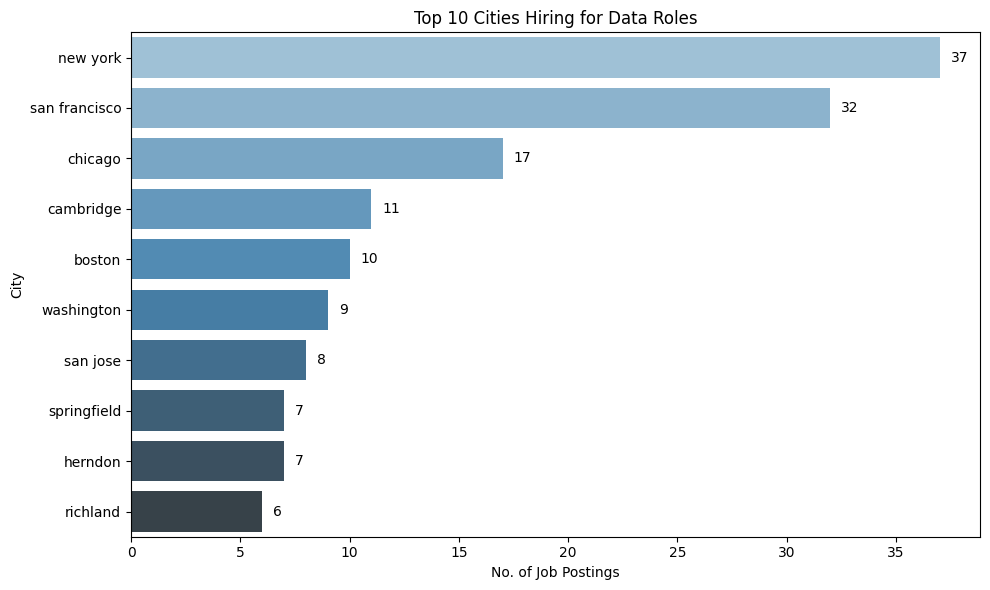

DAY 5: LOCATION INSIGHTS

Top 10 Cities with Job Postings:
         City  Postings
     new york        37
san francisco        32
      chicago        17
    cambridge        11
       boston        10
   washington         9
     san jose         8
  springfield         7
      herndon         7
     richland         6

Top 10 Countries with Job Postings:
Country  Postings
     ca        86
     ny        43
     ma        36
     va        30
     il        20
     pa        16
     md        15
     wa        15
     tx        14
     nj        10

Map saved as 'D:\Job posting and trends\kaggle _dataset_job\outputs\day5_india_job_map.html'. Open in browser to view.

All plots and outputs for Day 5 saved successfully.


In [13]:
# DAY 5 – LOCATION INSIGHTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import time
import os

# Setup paths
input_file = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)

# Load data
df = pd.read_csv(input_file)

# Clean and split location
df['Location'] = df['Location'].astype(str).str.strip()
df['City'] = df['Location'].apply(lambda loc: loc.split(',')[0].strip() if ',' in loc else loc)
df['Country'] = df['Location'].apply(lambda loc: loc.split(',')[-1].strip() if ',' in loc else 'Unknown')

# Top 10 cities
city_df = df['City'].value_counts().head(10).reset_index()
city_df.columns = ['City', 'Postings']

# Bar Plot: Top Cities
plt.figure(figsize=(10, 6))
sns.barplot(y='City', x='Postings', data=city_df, palette='Blues_d')
plt.title("Top 10 Cities Hiring for Data Roles")
plt.xlabel("No. of Job Postings")
plt.ylabel("City")
for i, row in city_df.iterrows():
    plt.text(row['Postings'] + 0.5, i, row['Postings'], va='center')
plt.tight_layout()

city_plot_path = os.path.join(output_dir, "day5_top_cities.png")
plt.savefig(city_plot_path)
plt.show()

# Top 10 countries
country_df = df['Country'].value_counts().head(10).reset_index()
country_df.columns = ['Country', 'Postings']

# Choropleth: Top Countries
fig = px.choropleth(
    data_frame=country_df,
    locations='Country',
    locationmode='country names',
    color='Postings',
    title='Top Countries Hiring for Data Science Roles',
    color_continuous_scale='Inferno'
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))

country_map_path = os.path.join(output_dir, "day5_top_countries.html")
fig.write_html(country_map_path)
fig.show()

# Save text output
output_lines = []
output_lines.append("DAY 5: LOCATION INSIGHTS\n")
output_lines.append("Top 10 Cities with Job Postings:")
output_lines.append(city_df.to_string(index=False))
output_lines.append("\nTop 10 Countries with Job Postings:")
output_lines.append(country_df.to_string(index=False))

text_output_path = os.path.join(output_dir, "day5_location_insights.txt")
with open(text_output_path, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))

print("\n".join(output_lines))

# Bonus: Interactive Folium Map of Top Indian Cities
geolocator = Nominatim(user_agent="geoapiExercises")
latitudes, longitudes = [], []

for city in city_df['City']:
    try:
        loc = geolocator.geocode(city + ", India")
        latitudes.append(loc.latitude if loc else None)
        longitudes.append(loc.longitude if loc else None)
        time.sleep(1)
    except:
        latitudes.append(None)
        longitudes.append(None)

city_df['Latitude'] = latitudes
city_df['Longitude'] = longitudes
valid_map_df = city_df.dropna(subset=['Latitude', 'Longitude'])

india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
marker_cluster = MarkerCluster().add_to(india_map)

for _, row in valid_map_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}: {row['Postings']} jobs",
        icon=folium.Icon(color='blue', icon='briefcase', prefix='fa')
    ).add_to(marker_cluster)

folium_map_path = os.path.join(output_dir, "day5_india_job_map.html")
india_map.save(folium_map_path)
print(f"\nMap saved as '{folium_map_path}'. Open in browser to view.")
print("\nAll plots and outputs for Day 5 saved successfully.")


DAY 6: SKILLS EXTRACTION

Top 20 Extracted Skills from Job Descriptions:

r: 385
python: 250
sql: 249
excel: 208
communication: 207
machine learning: 196
statistics: 179
data analysis: 117
spark: 111
aws: 102
java: 96
tableau: 94
leadership: 94
hadoop: 82
data visualization: 73
data mining: 64
sas: 57
problem solving: 54
collaboration: 47
tensorflow: 46


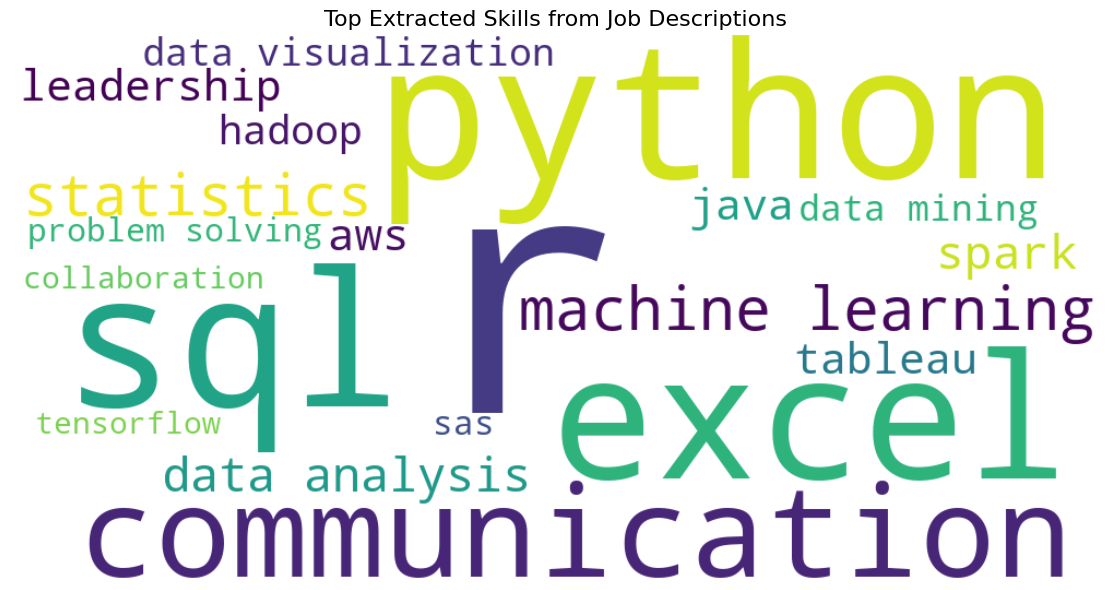

C:\Users\katev\AppData\Local\Temp\ipykernel_23540\1482638411.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




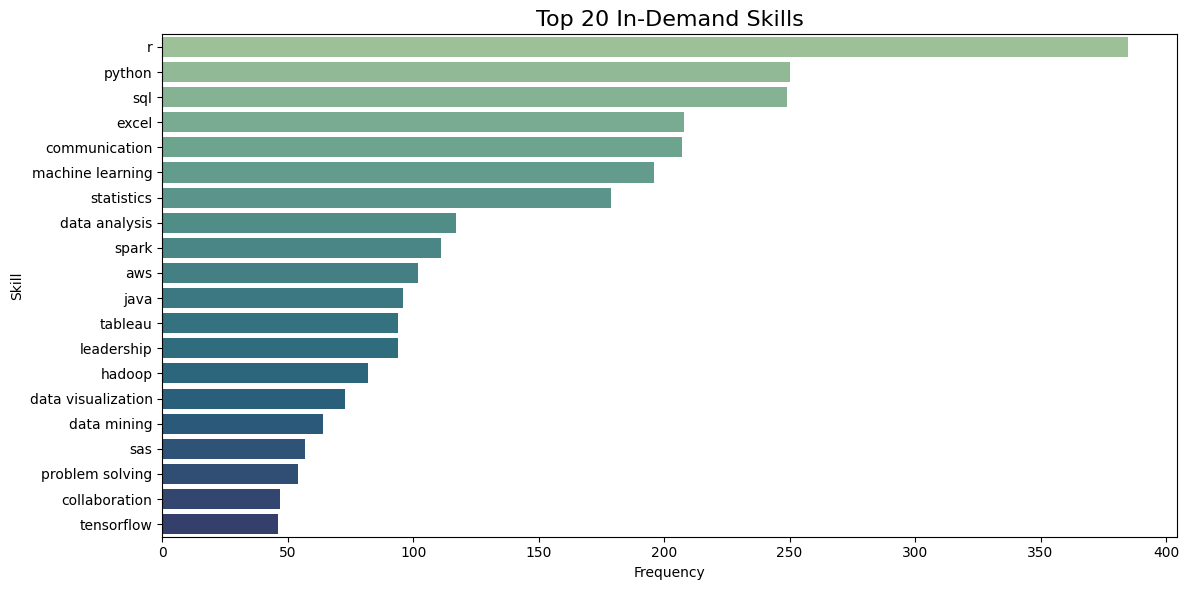

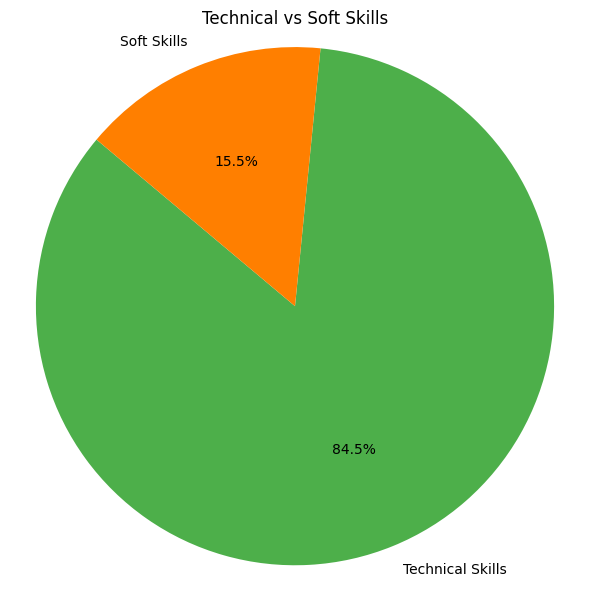


All plots and summary saved successfully in the outputs folder.


In [14]:
# DAY 6 – SKILLS EXTRACTION

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import spacy
from collections import Counter
import os

# Setup paths
input_file = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
df = pd.read_csv(input_file)

# Detect Job Description column
desc_col = None
for col in df.columns:
    if 'description' in col.lower():
        desc_col = col
        break

if not desc_col:
    raise ValueError("No job description column found!")

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Predefined skill keywords
technical_skills = [
    'python', 'r', 'java', 'sql', 'excel', 'power bi', 'tableau', 'spark', 'hadoop', 'sas',
    'machine learning', 'deep learning', 'data analysis', 'data visualization',
    'nlp', 'tensorflow', 'keras', 'pytorch', 'mongodb', 'azure', 'aws', 'flask', 'django',
    'matplotlib', 'seaborn', 'scikit-learn', 'pandas', 'numpy', 'statistics', 'data mining'
]

soft_skills = [
    'communication', 'teamwork', 'leadership', 'problem solving',
    'critical thinking', 'adaptability', 'creativity', 'collaboration'
]

# Combined list for matching
all_skills = technical_skills + soft_skills

# Extract skills
def extract_skills(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    found = []
    for skill in all_skills:
        if skill in text:
            found.append(skill)
    return found

df['Extracted Skills'] = df[desc_col].apply(extract_skills)

# Flatten and count
all_extracted_skills = [skill for sublist in df['Extracted Skills'] for skill in sublist]
skill_counts = Counter(all_extracted_skills)
top_skills = dict(skill_counts.most_common(20))

# Save top skill frequencies to text file
output_lines = ["DAY 6: SKILLS EXTRACTION\n"]
output_lines.append("Top 20 Extracted Skills from Job Descriptions:\n")
for skill, count in top_skills.items():
    output_lines.append(f"{skill}: {count}")
text_path = os.path.join(output_dir, "day6_skills_summary.txt")
with open(text_path, "w", encoding="utf-8") as f:
    f.write("\n".join(output_lines))
print("\n".join(output_lines))

# WordCloud
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate_from_frequencies(top_skills)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Extracted Skills from Job Descriptions", fontsize=16)
plt.tight_layout()
wordcloud_path = os.path.join(output_dir, "day6_skills_wordcloud.png")
plt.savefig(wordcloud_path)
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_skills.values()), y=list(top_skills.keys()), palette='crest')
plt.title("Top 20 In-Demand Skills", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
bar_path = os.path.join(output_dir, "day6_skills_bar.png")
plt.savefig(bar_path)
plt.show()

# Technical vs Soft Skills Pie Chart
tech_counts = {k: v for k, v in skill_counts.items() if k in technical_skills}
soft_counts = {k: v for k, v in skill_counts.items() if k in soft_skills}

plt.figure(figsize=(6, 6))
labels = ['Technical Skills', 'Soft Skills']
sizes = [sum(tech_counts.values()), sum(soft_counts.values())]
colors = ['#4daf4a', '#ff7f00']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')
plt.title("Technical vs Soft Skills")
plt.tight_layout()
pie_path = os.path.join(output_dir, "day6_skills_pie.png")
plt.savefig(pie_path)
plt.show()

print("\nAll plots and summary saved successfully in the outputs folder.")


Top 10 Skills by Seniority Level

Entry Level:
excel: 6

Mid Level:
excel: 166

Senior Level:
excel: 36



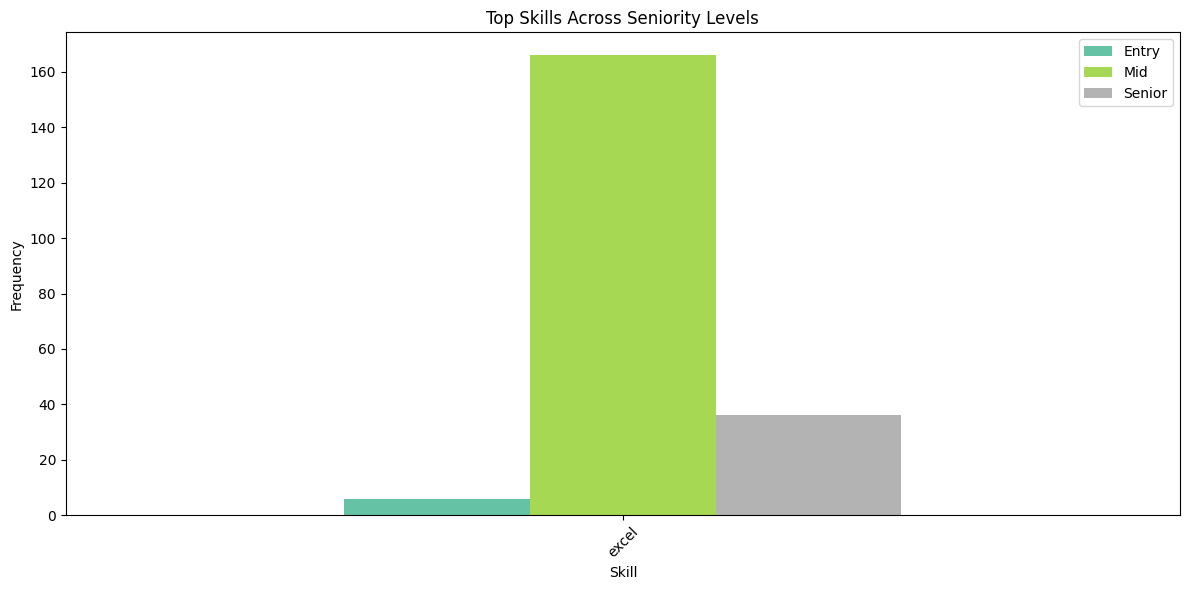

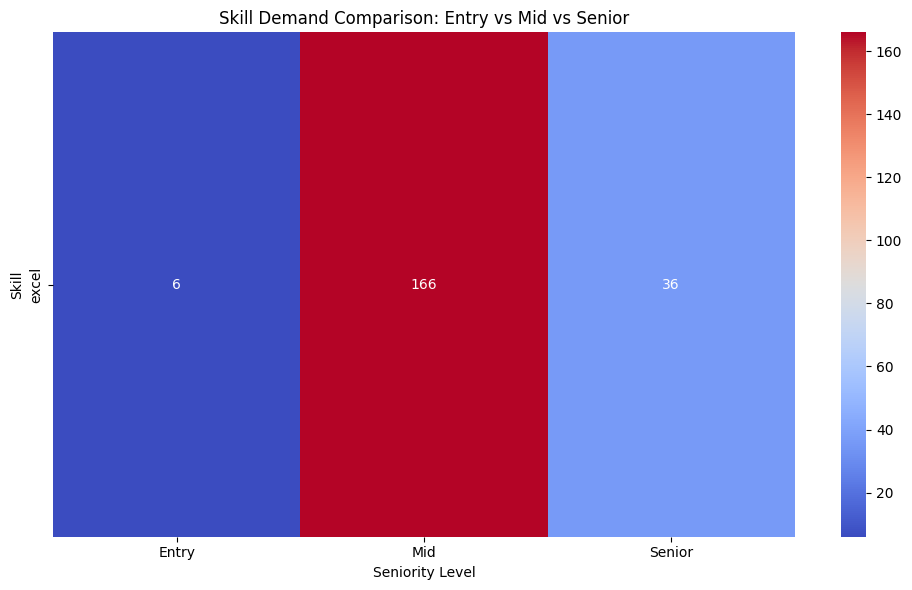


All DAY 7 plots and summary saved to outputs folder successfully.


In [15]:
# DAY 7 – SKILLS TRENDS ACROSS JOB LEVELS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Setup paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
df = pd.read_csv(input_path)

# Step 1: Infer Seniority Level
def infer_seniority(title):
    title = str(title).lower()
    if any(x in title for x in ['senior', 'lead', 'principal']):
        return 'senior'
    elif any(x in title for x in ['junior', 'entry', 'intern', 'associate']):
        return 'entry'
    else:
        return 'mid'

df['Seniority Level'] = df['Job Title'].apply(infer_seniority)

# Step 2: Detect skill columns
skill_columns = [col for col in df.columns if col.lower() in [
    'python', 'sql', 'excel', 'tableau', 'r', 'power bi', 
    'nlp', 'machine learning', 'deep learning', 'statistics'
]]

# Step 3: Extract skills from binary columns
def extract_skills(row):
    return [col for col in skill_columns if row.get(col, 0) == 1 or str(row.get(col)).lower() in ['yes', 'true']]

df['Extracted Skills'] = df.apply(extract_skills, axis=1)

# Step 4: Get top skills by seniority
def get_top_skills(df, level):
    skills = df[df['Seniority Level'] == level]['Extracted Skills']
    all_skills = [skill.lower() for sublist in skills for skill in sublist]
    return Counter(all_skills).most_common(10)

entry_skills = dict(get_top_skills(df, 'entry'))
mid_skills = dict(get_top_skills(df, 'mid'))
senior_skills = dict(get_top_skills(df, 'senior'))

# Save top skill counts
summary_path = os.path.join(output_dir, "day7_skill_counts_by_level.txt")
with open(summary_path, "w", encoding="utf-8") as f:
    f.write("Top 10 Skills by Seniority Level\n\n")
    f.write("Entry Level:\n")
    for skill, count in entry_skills.items():
        f.write(f"{skill}: {count}\n")
    f.write("\nMid Level:\n")
    for skill, count in mid_skills.items():
        f.write(f"{skill}: {count}\n")
    f.write("\nSenior Level:\n")
    for skill, count in senior_skills.items():
        f.write(f"{skill}: {count}\n")

print(open(summary_path, 'r', encoding='utf-8').read())

# Step 5: Combine into comparison dataframe
all_skills = set(entry_skills) | set(mid_skills) | set(senior_skills)
comparison_df = pd.DataFrame(index=list(all_skills))
comparison_df['Entry'] = pd.Series(entry_skills)
comparison_df['Mid'] = pd.Series(mid_skills)
comparison_df['Senior'] = pd.Series(senior_skills)
comparison_df = comparison_df.fillna(0).astype(int)

# 1. Bar Chart
comparison_df_sorted = comparison_df.sort_values('Entry', ascending=False).head(10)
comparison_df_sorted.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Top Skills Across Seniority Levels")
plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
bar_path = os.path.join(output_dir, "day7_skills_comparison_bar.png")
plt.savefig(bar_path)
plt.show()

# 2. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(comparison_df, annot=True, fmt='d', cmap='coolwarm')
plt.title("Skill Demand Comparison: Entry vs Mid vs Senior")
plt.xlabel("Seniority Level")
plt.ylabel("Skill")
plt.tight_layout()
heatmap_path = os.path.join(output_dir, "day7_skills_comparison_heatmap.png")
plt.savefig(heatmap_path)
plt.show()

print("\nAll DAY 7 plots and summary saved to outputs folder successfully.")


Skill Demand Table Across Top 5 Companies

                               PYTHON  R  SPARK  AWS  EXCEL
Company Name                                               
liberty mutual insurance\n3.3       4  0      0    0      1
massmutual\n3.6                     4  0      4    3      5
mitre\n3.2                          4  0      2    0      3
novetta\n4.0                        5  0      1    4      0
pnnl\n3.8                           3  0      0    0      0


<Figure size 1200x600 with 0 Axes>

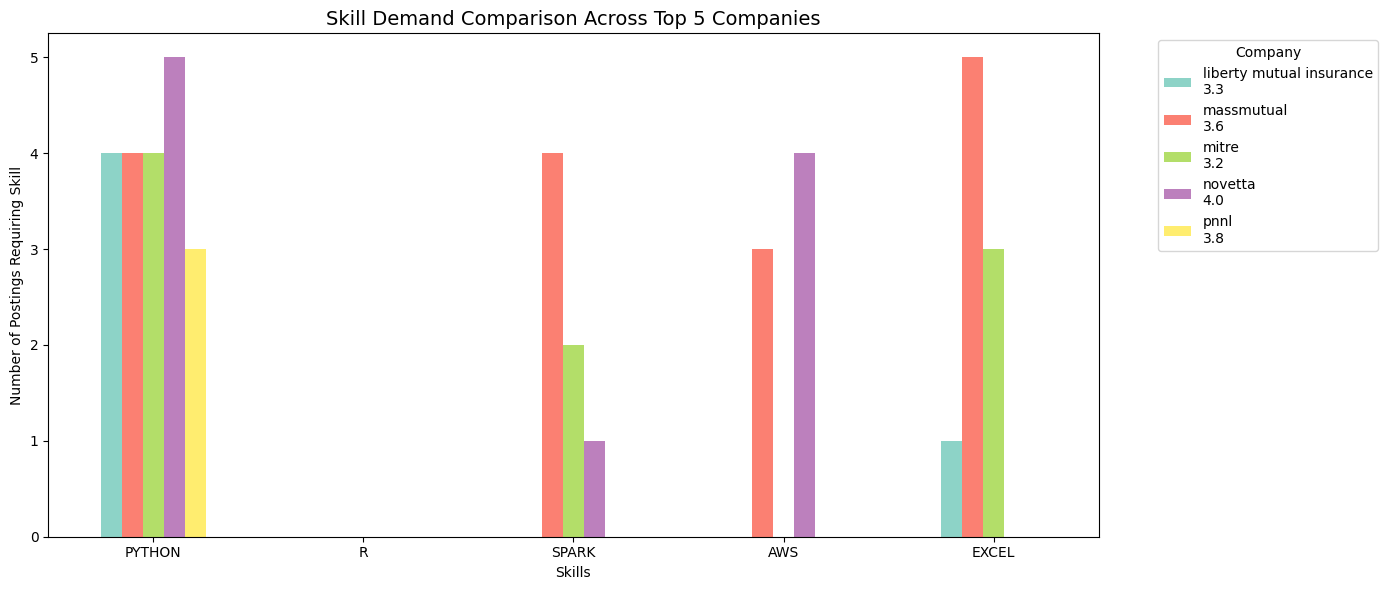


Plot and table saved to: D:\Job posting and trends\kaggle _dataset_job\outputs


In [16]:
# DAY 8 – SKILL DEMAND

import pandas as pd
import matplotlib.pyplot as plt
import os

# Setup paths
input_path = r"D:\Job posting and trends\kaggle _dataset_job\notebook\cleaned_data\cleaned_jobs.csv"
output_dir = r"D:\Job posting and trends\kaggle _dataset_job\outputs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
df = pd.read_csv(input_path)

# Step 1: Define relevant columns
skill_columns = ['python_yn', 'R_yn', 'spark', 'aws', 'excel']
company_col = 'Company Name' if 'Company Name' in df.columns else 'Company'

# Step 2: Clean company column
df[company_col] = df[company_col].astype(str).str.strip()

# Step 3: Select top companies with most postings
top_companies = df[company_col].value_counts().head(5).index
filtered_df = df[df[company_col].isin(top_companies)]

# Step 4: Group by company and count skills
skill_demand = filtered_df.groupby(company_col)[skill_columns].sum()

# Optional: Rename skill columns for cleaner axis labels
skill_demand.columns = [col.replace('_yn', '').upper() for col in skill_demand.columns]

# Print summary table
summary_path = os.path.join(output_dir, "day8_skill_demand_summary.txt")
with open(summary_path, "w", encoding="utf-8") as f:
    f.write("Skill Demand Table Across Top 5 Companies\n\n")
    f.write(skill_demand.to_string())
print(open(summary_path, "r", encoding="utf-8").read())

# Step 5: Plot
plt.figure(figsize=(12, 6))
skill_demand.T.plot(kind='bar', figsize=(14, 6), colormap='Set3')
plt.title("Skill Demand Comparison Across Top 5 Companies", fontsize=14)
plt.xlabel("Skills")
plt.ylabel("Number of Postings Requiring Skill")
plt.xticks(rotation=0)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save plot
plot_path = os.path.join(output_dir, "day8_skill_demand_comparison.png")
plt.savefig(plot_path)
plt.show()

print(f"\nPlot and table saved to: {output_dir}")
